## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [5]:
titanic.drop(columns="Cabin", inplace = True)
titanic.dropna(inplace=True)

In [6]:
titanic.shape

(712, 11)

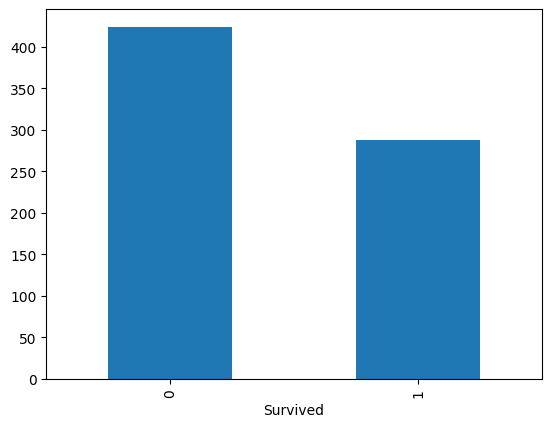

In [7]:
survived = titanic["Survived"].value_counts()
survived.plot(kind="bar")
plt.show()

- Preparing the data before modeling

In [8]:
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace = True)

In [9]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,
                                         "female":1})

C:\Users\user\AppData\Local\Temp\ipykernel_13396\1812906043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male":0,


In [10]:
titanic = pd.get_dummies(titanic, columns=["Embarked"])

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


For baseline, we will train a Logistic Regression in imbalanced data.

In [12]:
features = titanic.drop(columns = ["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
log_reg.score(X_test_scaled, y_test)

0.7752808988764045

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       109
           1       0.76      0.61      0.68        69

    accuracy                           0.78       178
   macro avg       0.77      0.74      0.75       178
weighted avg       0.77      0.78      0.77       178



#### Oversampling

In [18]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [19]:
train["Survived"] = y_train.values

In [20]:
survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

In [21]:
yes_diabetes_oversampled = resample(survived, replace=True, n_samples = len(no_survived), random_state=0)

In [22]:
train_over = pd.concat([yes_diabetes_oversampled, no_survived])
train_over

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
443,0.903926,1.266838,-0.532340,-0.53668,-0.500398,-0.500578,-0.471135,-0.202326,0.532592,1
127,-0.305840,1.266838,1.421125,-0.53668,-0.500398,-0.448190,-0.471135,-0.202326,0.532592,1
304,0.903926,1.266838,-0.392807,0.53668,-0.500398,-0.346270,-0.471135,-0.202326,0.532592,1
479,0.903926,-0.789367,0.165326,-0.53668,-0.500398,-0.498593,-0.471135,-0.202326,0.532592,1
187,-1.515605,1.266838,1.700192,0.53668,-0.500398,0.483372,2.122535,-0.202326,-1.877611,1
...,...,...,...,...,...,...,...,...,...,...
524,0.903926,-0.789367,-0.392807,-0.53668,-0.500398,-0.467240,-0.471135,-0.202326,0.532592,0
525,-0.305840,-0.789367,-0.392807,-0.53668,-0.500398,-0.400564,-0.471135,-0.202326,0.532592,0
527,-0.305840,-0.789367,-0.462574,-0.53668,-0.500398,-0.400564,-0.471135,-0.202326,0.532592,0
529,0.903926,-0.789367,-0.392807,0.53668,-0.500398,-0.341508,-0.471135,-0.202326,0.532592,0


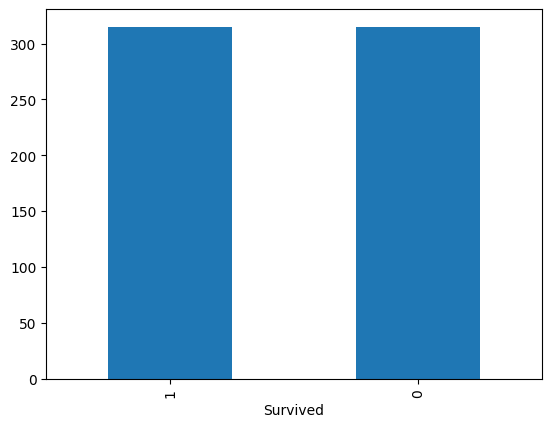

In [23]:
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [24]:
X_train_over = train_over.drop(columns = ["Survived"])
y_train_over = train_over["Survived"]

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.73      0.64      0.68        69

    accuracy                           0.77       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.77      0.77      0.77       178



c:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Undersampling

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [27]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-1.515605,1.266838,-0.392807,-0.53668,-0.500398,0.671971,2.122535,-0.202326,-1.877611,1
1,0.903926,-0.789367,-0.811407,-0.53668,-0.500398,-0.490100,-0.471135,-0.202326,0.532592,0
2,0.903926,1.266838,-1.160240,-0.53668,-0.500398,-0.510499,2.122535,-0.202326,-1.877611,1
3,0.903926,1.266838,0.095559,-0.53668,-0.500398,-0.482798,-0.471135,-0.202326,0.532592,1
4,-1.515605,-0.789367,1.281592,0.53668,-0.500398,0.342400,-0.471135,-0.202326,0.532592,1
...,...,...,...,...,...,...,...,...,...,...
529,0.903926,-0.789367,-0.392807,0.53668,-0.500398,-0.341508,-0.471135,-0.202326,0.532592,0
530,0.903926,1.266838,-0.462574,-0.53668,-0.500398,-0.504388,-0.471135,-0.202326,0.532592,1
531,-1.515605,-0.789367,0.165326,-0.53668,-0.500398,-0.067183,2.122535,-0.202326,-1.877611,1
532,0.903926,-0.789367,-0.950940,-0.53668,-0.500398,-0.494863,-0.471135,-0.202326,0.532592,0


In [28]:
no_diabetes_undersampled = resample(no_survived, 
                                    replace=False, 
                                    n_samples = len(survived),
                                    random_state=0)
no_diabetes_undersampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
102,0.903926,-0.789367,-0.950940,0.536680,0.656366,-0.262449,-0.471135,-0.202326,0.532592,0
532,0.903926,-0.789367,-0.950940,-0.536680,-0.500398,-0.494863,-0.471135,-0.202326,0.532592,0
242,-0.305840,-0.789367,-0.462574,-0.536680,-0.500398,-0.361590,2.122535,-0.202326,-1.877611,0
254,-0.305840,-0.789367,-0.113741,-0.536680,-0.500398,-0.391038,-0.471135,-0.202326,0.532592,0
166,0.903926,-0.789367,-0.462574,-0.536680,-0.500398,-0.498593,-0.471135,-0.202326,0.532592,0
...,...,...,...,...,...,...,...,...,...,...
151,0.903926,-0.789367,-1.299773,-0.536680,-0.500398,-0.290310,2.122535,-0.202326,-1.877611,0
404,-0.305840,-0.789367,0.095559,0.536680,0.656366,-0.148147,-0.471135,-0.202326,0.532592,0
144,0.903926,-0.789367,-1.299773,4.830124,1.813129,0.245243,-0.471135,-0.202326,0.532592,0
380,-0.305840,-0.789367,-0.602107,1.610041,-0.500398,0.751982,-0.471135,-0.202326,0.532592,0


In [29]:
train_under = pd.concat([no_diabetes_undersampled, survived])
train_under

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
102,0.903926,-0.789367,-0.950940,0.53668,0.656366,-0.262449,-0.471135,-0.202326,0.532592,0
532,0.903926,-0.789367,-0.950940,-0.53668,-0.500398,-0.494863,-0.471135,-0.202326,0.532592,0
242,-0.305840,-0.789367,-0.462574,-0.53668,-0.500398,-0.361590,2.122535,-0.202326,-1.877611,0
254,-0.305840,-0.789367,-0.113741,-0.53668,-0.500398,-0.391038,-0.471135,-0.202326,0.532592,0
166,0.903926,-0.789367,-0.462574,-0.53668,-0.500398,-0.498593,-0.471135,-0.202326,0.532592,0
...,...,...,...,...,...,...,...,...,...,...
526,-0.305840,1.266838,-0.741640,-0.53668,-0.500398,-0.152909,-0.471135,-0.202326,0.532592,1
528,-0.305840,1.266838,-0.113741,-0.53668,-0.500398,-0.400564,-0.471135,-0.202326,0.532592,1
530,0.903926,1.266838,-0.462574,-0.53668,-0.500398,-0.504388,-0.471135,-0.202326,0.532592,1
531,-1.515605,-0.789367,0.165326,-0.53668,-0.500398,-0.067183,2.122535,-0.202326,-1.877611,1


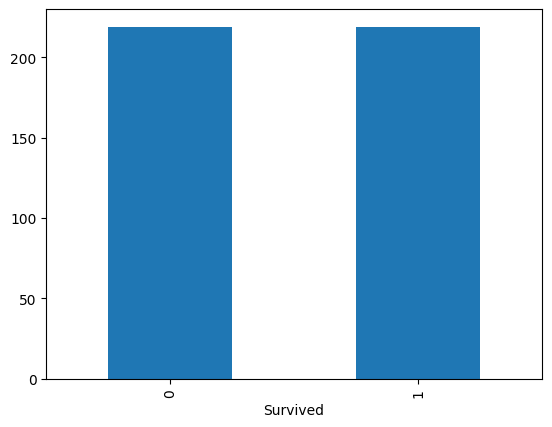

In [30]:
survived_plt = train_under["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both survived and not_survived. Let's see how it can impact our model 

- Separating our features from our target

In [31]:
X_train_under = train_under.drop(columns = ["Survived"])
y_train_under = train_under["Survived"]

- Model training

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

- Evaluate our model

In [33]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       109
           1       0.69      0.67      0.68        69

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



c:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### SMOTE

SMOTE utilizes KNN approach to generate synthetic samples for the minority class.

SMOTE comes from a different package - **imblearn**

In [34]:
from imblearn.over_sampling import SMOTE

Now, we need to create a SMOTE object in order to balance our data

- **sampling_strategy** - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

In [35]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [36]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

- Now lets train our model, to see if get any improvements.

In [37]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [38]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       109
           1       0.70      0.65      0.68        69

    accuracy                           0.76       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.76      0.76      0.76       178

